### This program uses the original script of the 70-30 train/split of Mazvidal 
but substitutes in the Diaz instances of 28 random samples from his fight with Pettis
The results exactly predicted as of the moment are only printed out with decision trees,
still working on printing the actual predicted results in ensemble (logistic, naive bayes, random forest)
and random forests as the stand alone prediction. This script only shows the results of prediction 
accuracy as a side by side comparison of how Mazvidal lands hit compared to Diaz, given Diaz
mostly lands close hits in a clinch or against a cage or on the ground
            


### Sci-kit learns (sklearn)  in prediction, Decision Tree with 5 trees scored the comparison of hits as 57%
this is not for prediction accuracy, it is for a comparison of a model that scored around 85% on the 28 samples simulated
from a completely different set. Percentages are comparison measures in hits landed for two different fighters with different
measures of accumulated total hits missed/received/landed per round and accumulated hits missed/received/landed per round
Other sklearn accuracy measures for modular ML algorithms were:
    KNN with  50% 
    Random Forest with  46.4%  on the testing set with 50 trees
    ensemble (on logistic [55%], naive bayes [38%], and random forests [53%]) with  56% 
    Decision Tree with max depth of 3 scored 506% 
    decision tree with 2 as max depth was  43% 
    decision tree with 5 as max depth was  57% 
    decision tree with 10 as max depth was  54% 

In [1]:
%%time

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Read in the file for the dataset used in the final project due Week 8
df = pd.read_csv('MazvidalTillUFC.csv', index_col=0)



Wall time: 44.5 s


In [2]:
df.head() #lists Type as the string factor names

SecondsIntoRound  SecondsLastRoundAction  cmTotHitsR-X1  cmTotHitsL-X1  \
Round                                                                           
1                     1                       1              0              0   
1                     4                       4              0              0   
1                    12                       8              1              0   
1                    13                       1              1              0   
1                    20                       8              1              0   

       cmTotHitsM-X1  Hits-Recvd-X1  Hits-Lnd-X1  Hits-Mssd-X1  cmTotHitsR-X2  \
Round                                                                           
1                  0              0            0             0              0   
1                  0              0            0             0              0   
1                  0              1            0             0              0   
1                  0              0            0             0              0   
1                  0              0            0             0              0   

       cmTotHitsL-X2  cmTotHitsM-X2  Hits-Recvd-X2  Hits-Lnd-X2  Hits-Mssd-X2  \
Round                                                                           
1                  0              0              0            0             0   
1                  0              0              0            0             0   
1                  1              0              0            1             0   
1                  1              0              0            0             0   
1                  1              0              0            0             0   

       Time    MasvidalFighterActionReactions  \
Round                                           
1      5:00  runs in for low kick immediately   
1      4:57          lands illegal groin kick   
1      4:49                receives head shot   
1      4:48                   drops to ground   
1      4:41               still on the ground   

                    TillFightersActionsReactions  \
Round                                              
1                                              0   
1      referee pauses fight 30 seconds to regain   
1                         lands left hit to head   
1                                              0   
1                            overpowering on top   

                                                   notes  
Round                                                     
1      liverpool, England and Till (south paw) is the...  
1                                                    NaN  
1                                                    NaN  
1                                                    NaN  
1                                                    NaN

In [3]:
df.describe()

SecondsIntoRound  SecondsLastRoundAction  cmTotHitsR-X1  cmTotHitsL-X1  \
count         92.000000               92.000000      92.000000      92.000000   
mean         121.793478                5.652174       3.891304       6.228261   
std           79.356414                4.920097       2.018903       4.294395   
min            1.000000                0.000000       0.000000       0.000000   
25%           49.750000                2.000000       2.000000       2.750000   
50%          121.000000                4.000000       4.000000       6.000000   
75%          174.500000                8.000000       5.000000      10.000000   
max          298.000000               28.000000       8.000000      14.000000   

       cmTotHitsM-X1  Hits-Recvd-X1  Hits-Lnd-X1  Hits-Mssd-X1  cmTotHitsR-X2  \
count      92.000000      92.000000    92.000000     92.000000      92.000000   
mean        9.282609       0.152174     0.260870      0.413043       6.228261   
std         6.758513       0.361158     0.488765      0.595813       4.294395   
min         0.000000       0.000000     0.000000      0.000000       0.000000   
25%         4.000000       0.000000     0.000000      0.000000       2.750000   
50%         8.500000       0.000000     0.000000      0.000000       6.000000   
75%        14.000000       0.000000     0.000000      1.000000      10.000000   
max        23.000000       1.000000     2.000000      2.000000      14.000000   

       cmTotHitsL-X2  cmTotHitsM-X2  Hits-Recvd-X2  Hits-Lnd-X2  Hits-Mssd-X2  
count      92.000000      92.000000      92.000000    92.000000     92.000000  
mean        3.891304       2.760870       0.260870     0.152174      0.195652  
std         2.018903       3.378567       0.488765     0.361158      0.450619  
min         0.000000       0.000000       0.000000     0.000000      0.000000  
25%         2.000000       0.000000       0.000000     0.000000      0.000000  
50%         4.000000       1.000000       0.000000     0.000000      0.000000  
75%         5.000000       5.000000       0.000000     0.000000      0.000000  
max         8.000000      11.000000       2.000000     1.000000      2.000000

### Lets make the target variable the 'Hits-lnd-A'-6 based on the first 6 fields: 


## Split the data into 70% Training and 30% Testing Samples

In [4]:
X = df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12]].values # returns array of all instances other than the target
y = df.iloc[:, 7] .values # returns array of all instances of the target
#y = np.where(y=='uterine healthy tissue',0,1) # gives all entries 0 if equal to 'uterine ...' and 1 otherwise
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64L, 12L)
(28L, 12L)
(64L,)
(28L,)


### There are 64 training samples and 28 testing samples with above split of 70-30

In [5]:
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

C:\Users\m\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
print "Training set samples: ", len(X_train)
print "Testing set samples: ", len(X_test)

Training set samples:  64
Testing set samples:  28


In [49]:
# Read in the Diaz and Pettis data set and select 28 of those instances to use as a testing set
# comparison of how these models trained will compare hits landed for Mazvidal compared to Diaz's hits landed
df2 = pd.read_csv('DiazPettisUFC.csv')#, index_col=0)

In [50]:
diaz = df2.iloc[[45, 89, 69,40 ,67 ,50 ,16 ,47, 56, 14 , 7 ,63 ,80 ,28, 44 ,58, 60,15 ,11,77, 20 ,19 ,59, 30, 25 ,42 ,55, 68], ]

In [51]:
diaz


Round  SecondsIntoRound  SecondsLastRoundAction  cmTotHitsR-X1  \
45      1               225                       2              5   
89      2                81                       3              5   
69      2                14                       4              1   
40      1               187                       4              3   
67      2                 8                       2              1   
50      1               239                       1              7   
16      1                67                       3              1   
47      1               236                       2              6   
56      1               257                       3              7   
14      1                63                       1              1   
7       1                42                       3              0   
63      1               292                       7              7   
80      2                48                       4              2   
28      1               150                       3              1   
44      1               204                       3              4   
58      1               262                       2              7   
60      1               275                       2              7   
15      1                64                       1              1   
11      1                54                       4              1   
77      2                35                       2              2   
20      1                84                       1              1   
19      1                76                       3              1   
59      1               273                      13              7   
30      1               153                       1              1   
25      1               120                       3              1   
42      1               200                       6              3   
55      1               254                       1              7   
68      2                10                       2              1   

    cmTotHitsL-X1  cmTotHitsM-X1  Hits-Recvd-X1  Hits-Lnd-X1  Hits-Mssd-X1  \
45             27             17              0            1             0   
89              6             16              0            0             0   
69              4              0              0            1             0   
40             25             13              1            0             0   
67              2              0              0            2             0   
50             31             17              0            1             0   
16              4              8              0            1             0   
47             29             17              1            1             0   
56             40             17              0            1             0   
14              3              8              0            1             0   
7               2              4              0            0             0   
63             44             22              0            0             1   
80              6              7              0            0             0   
28             17             11              0            2             0   
44             25             17              1            0             0   
58             41             17              0            0             0   
60             44             17              0            2             0   
15              3              8              0            0             0   
11              2              6              0            0             1   
77              6              7              0            0             1   
20             12              8              0            2             0   
19             10              8              0            2             0   
59             42             17              0            1             0   
30             20             11              0            2             0   
25             14      

In [ ]:
y_test = diaz.iloc[:,7]
y_test.shape

In [53]:
X_train_std = X_train_scaled
X_test_std = X_test_scaled

### KNN

In [54]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
% time
knn = KNeighborsClassifier()
knn.fit(X_train,
        y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
% time
y_pred = knn.predict(X_test)#_std)

Wall time: 0 ns


In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print cm
print 'Accuracy: ',accuracy_score(y_test, y_pred)


[[12  0  0]
 [ 8  2  0]
 [ 6  0  0]]
Accuracy:  0.5


### Decision Trees


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [58]:
% time
dtc = tree.DecisionTreeClassifier(criterion='entropy')#, max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Wall time: 0 ns
Decision Tree Results
Confusion Matrix: 
[[10  2  0]
 [ 7  3  0]
 [ 4  1  1]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.48      0.83      0.61        12
           1       0.50      0.30      0.37        10
           2       1.00      0.17      0.29         6

   micro avg       0.50      0.50      0.50        28
   macro avg       0.66      0.43      0.42        28
weighted avg       0.60      0.50      0.45        28



### Decision Tree Regression

In [59]:
#Week 7 ipynb

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [60]:
import random #keep the same results when running the code, as results vary with each run of code
random.seed(100)

In [61]:
# Fit regression model
% time
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_3 = tree.DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

# Predict
#X_test = np.arange(0.0, 300, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
% time

Wall time: 0 ns
Wall time: 0 ns


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [63]:
print "Decision Tree Regression Prediction with Max Depth=2" 
print y_1.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results Max Depth=2\nConfusion Matrix: "
print confusion_matrix(y_test,y_1.round())
print "\n Classifcation Report"
print classification_report(y_test,y_1.round())

a=sum(y_1.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_1.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=2"
print round(float(a)/float(b),2),"%"


Decision Tree Regression Prediction with Max Depth=2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

Actual Testing Subset Categorical Values:
45    1
89    0
69    1
40    0
67    2
50    1
16    1
47    1
56    1
14    1
7     0
63    0
80    0
28    2
44    0
58    0
60    2
15    0
11    0
77    0
20    2
19    2
59    1
30    2
25    0
42    0
55    1
68    1
Name: Hits-Lnd-X1, dtype: int64

Decision Tree Results Max Depth=2
Confusion Matrix: 
[[12  0  0]
 [10  0  0]
 [ 6  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        12
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         6

   micro avg       0.43      0.43      0.43        28
   macro avg       0.14      0.33      0.20        28
weighted avg       0.18      0.43      0.26        28

The number of testing samples:
28
The number of correct prediction

In [64]:
print "Decision Tree Regression Prediction with Max Depth=5" 
print y_2.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_2.round())
print "\n Classifcation Report"
print classification_report(y_test,y_2.round())

Decision Tree Regression Prediction with Max Depth=5
[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1.]

Actual Testing Subset Categorical Values:
45    1
89    0
69    1
40    0
67    2
50    1
16    1
47    1
56    1
14    1
7     0
63    0
80    0
28    2
44    0
58    0
60    2
15    0
11    0
77    0
20    2
19    2
59    1
30    2
25    0
42    0
55    1
68    1
Name: Hits-Lnd-X1, dtype: int64

Decision Tree Results
Confusion Matrix: 
[[11  1  0]
 [ 5  5  0]
 [ 1  5  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.45      0.50      0.48        10
           2       0.00      0.00      0.00         6

   micro avg       0.57      0.57      0.57        28
   macro avg       0.37      0.47      0.41        28
weighted avg       0.44      0.57      0.50        28



In [65]:
a=sum(y_2.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_2.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=5"
print round(float(a)/float(b),2),"%"

The number of testing samples:
28
The number of correct predictions:
16
45     True
89     True
69    False
40     True
67    False
50    False
16    False
47    False
56     True
14    False
7      True
63     True
80     True
28    False
44     True
58     True
60    False
15     True
11     True
77    False
20    False
19    False
59     True
30    False
25     True
42     True
55     True
68     True
Name: Hits-Lnd-X1, dtype: bool

Accuracy of Decision Tree with Max Depth=5
0.57 %


### Decision Tree with Max Depth = 5 and Max Depth = 10 produced similar results

In [66]:
print "Decision Tree Regression Prediction with Max Depth=10" 
print y_3.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_3.round())
print "\n Classifcation Report"
print classification_report(y_test,y_3.round())

a=sum(y_3.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_3.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=10"
print round(float(a)/float(b),2),"%"

Decision Tree Regression Prediction with Max Depth=10
[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0.]

Actual Testing Subset Categorical Values:
45    1
89    0
69    1
40    0
67    2
50    1
16    1
47    1
56    1
14    1
7     0
63    0
80    0
28    2
44    0
58    0
60    2
15    0
11    0
77    0
20    2
19    2
59    1
30    2
25    0
42    0
55    1
68    1
Name: Hits-Lnd-X1, dtype: int64

Decision Tree Results
Confusion Matrix: 
[[12  0  0]
 [ 7  3  0]
 [ 3  3  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        12
           1       0.50      0.30      0.37        10
           2       0.00      0.00      0.00         6

   micro avg       0.54      0.54      0.54        28
   macro avg       0.35      0.43      0.36        28
weighted avg       0.41      0.54      0.44        28

The number of testing samples:
28
The number of correct predictions:
15
45   

### Ensemble Trees, Voting Classifier
logistic, random forest, and gaussian naive bayes used

In [67]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_std, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.55 (+/- 0.13) [Logistic Regression]
Accuracy: 0.53 (+/- 0.06) [Random Forest]
Accuracy: 0.38 (+/- 0.13) [naive Bayes]
Accuracy: 0.56 (+/- 0.07) [Ensemble]


### PCA then K-means UnSupervised classification

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import manifold

np.random.seed = 47

In [69]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_
print X_train_pca.shape

(64L, 12L)


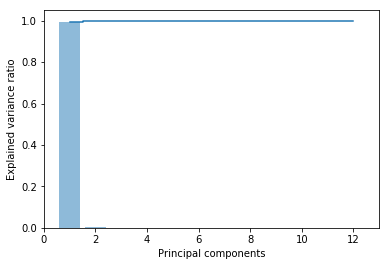

In [70]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [71]:
n_neighbors = 10
n_components = 2

Wall time: 31 ms


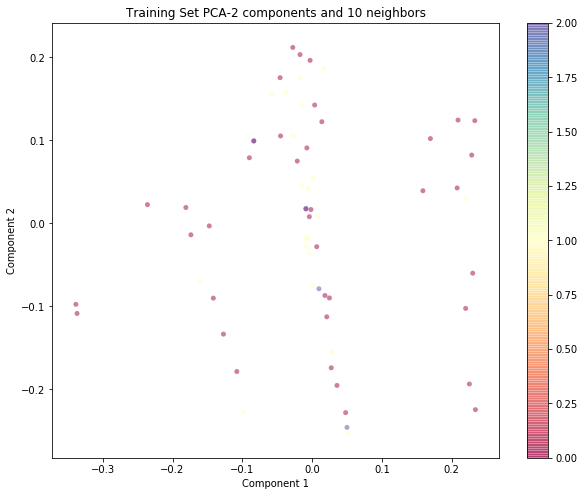

In [72]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_train_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Training Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

In [73]:
pca = PCA()
X_test_pca = pca.fit_transform(X_test_std)
pca.explained_variance_ratio_
print X_test_pca.shape

(28L, 12L)


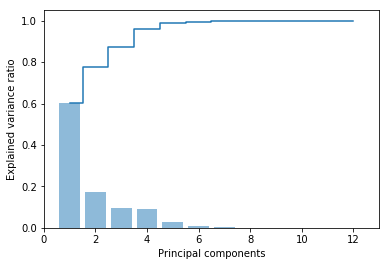

In [74]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [75]:
n_neighbors = 10
n_components = 2

Wall time: 16 ms


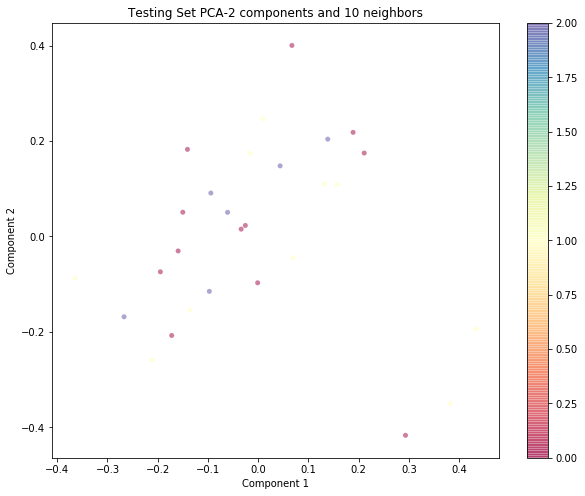

In [76]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_test_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Testing Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

### K-means

In [77]:
from sklearn.cluster import KMeans
Y = KMeans(n_clusters=2).fit_transform(X_train_std)

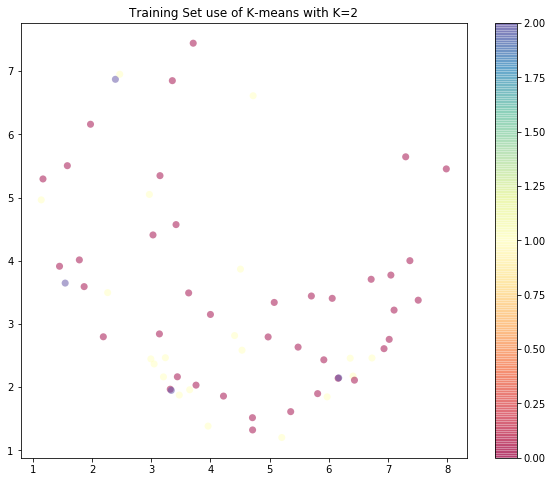

In [78]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y[:, 0], Y[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Training Set use of K-means with K=2')
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

In [79]:
Y1 = KMeans(n_clusters=2).fit_transform(X_test_std)

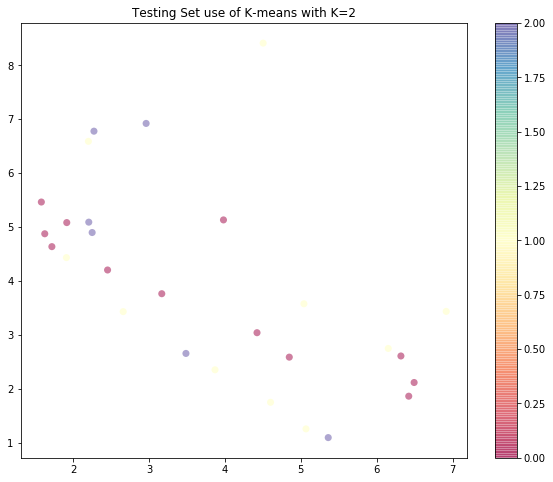

In [80]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y1[:, 0], Y1[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Testing Set use of K-means with K=2')
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

### Random Forests

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_train_std, y_train)

print grid
# summarize the results of the grid search
print 'Grid Training Set Best Score: ',grid.best_score_
print 'Grid Training Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Training Set Best Score:  0.546875
Grid Training Set Best Number of Trees Estimator:  300


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list), verbose=1)
grid.fit(X_test_std, y_test)

print grid
# summarize the results of the grid search
print 'Grid Testing Set Best Score: ',grid.best_score_
print 'Grid Testing Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   26.4s finished
C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)
Grid Testing Set Best Score:  0.4642857142857143
Grid Testing Set Best Number of Trees Estimator:  50


In [93]:
print grid.estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False)
